In [2]:
import sys,os
os.environ['pRT_input_data_path'] = '/Users/nasedkin/python-packages/petitRADTRANS/petitRADTRANS/input_data/'
os.environ["OMP_NUM_THREADS"] = "1"
import numpy as np
import matplotlib.pyplot as plt
from petitRADTRANS.retrieval import plot_style as ps
from astropy.io import fits
from glob import glob
from spectres import spectres
import scicomap as sc
qual_map = sc.ScicoSequential(cmap='YlOrRd')
feh_cmap = qual_map.get_mpl_color_map()
version = "v01"

species v0.6.0
Working folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks
Configuration settings:
   - Database: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/species_database.hdf5
   - Data folder: /Users/nasedkin/Documents/Paper2_HR8799_Notebooks/data
   - Interpolation method: linear
   - Magnitude of Vega: 0.03
Using pRT Plotting style!


/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


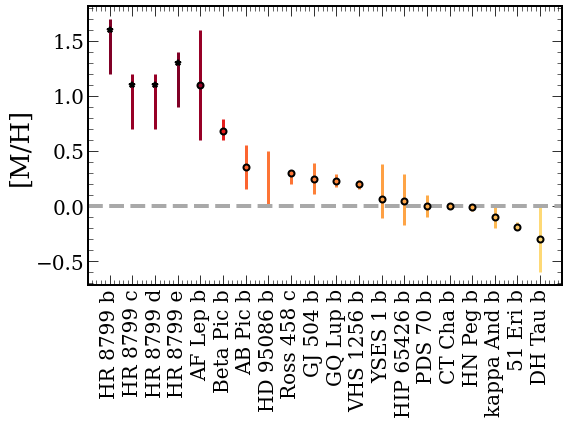

In [67]:
planets = {}
planets["HR 8799 b"] = [1.6,0.4,0.1]
planets["HR 8799 c"] = [1.1,0.4,0.1]
planets["HR 8799 d"] = [1.1,0.4,0.1]
planets["HR 8799 e"] = [1.3,0.4,0.1]
planets["AF Lep b"] = [1.1,0.5,0.5]
planets["Beta Pic b"] = [0.68,0.08,0.11]
planets["AB Pic b"] = [0.36,0.20,0.2]
planets["HD 95086 b"] = [0.3,0.3,0.2]
planets["Ross 458 c"] = [0.3, 0.1, 0.0]
planets["GJ 504 b"] = [0.25, 0.14, 0.14]
planets["GQ Lup b"] = [0.23,0.06,0.06]
planets["VHS 1256 b"] = [0.2,0.04,0.04]
planets["YSES 1 b"] = [0.07,0.18,0.31]
planets["HIP 65426 b"] = [0.05,0.22,0.24 ]
planets["PDS 70 b"] = [0.0,0.1,0.1]
planets["CT Cha b"] = [0.0,0.01,0.01]

planets["HN Peg b"] = [-0.01,0.03,0.03]
planets["kappa And b"] = [-0.1,0.1,0.1]
planets["51 Eri b"] = [-0.19,0.03,0.05]
planets["DH Tau b"] = [-0.3,0.3,0.3]


labels = ['HR 8799 b', 'HR 8799 c', 'HR 8799 d', 'HR 8799 e', "AF Lep b", 'Beta Pic b', "AB Pic b", 'PDS 70 b', '51 Eri b', 'VHS 1256 b', 'kappa And b', 'YSES 1 b']
fig, ax = plt.subplots(figsize = (8,6))
i = 0
for key,val in planets.items():
    color = (val[0] + 0.8)/2
    marker = 'o'
    if key == 'HD 95086 b':
        marker = None
    if "HR 8799" in key:
        marker = '*'
    ax.errorbar(i,val[0], yerr =[[val[1]],[val[2]]], 
                color =feh_cmap(color), 
                marker = marker,
                markeredgecolor = 'k', 
                markersize = 6, 
                markeredgewidth = 2,
                elinewidth = 3)
    i+=1
ax.set_xticks(range(len(planets.keys())))
ax.set_xticklabels(list(planets.keys()),rotation=90, fontsize = 20)
ax.axhline(0.0, color = 'darkgrey', linewidth = 4, linestyle = '--')
ax.set_ylabel("[M/H]")
plt.savefig(f"plots/DirectImagedMetallicities_{version}.pdf",bbox_inches = 'tight')

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


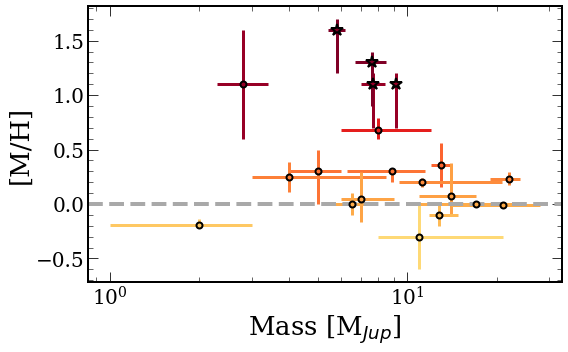

In [71]:
masses = {}
masses["HR 8799 b"] = [5.8,0.4,0.4]
masses["HR 8799 c"] = [7.7,0.7,0.7]
masses["HR 8799 d"] = [9.2,0.1,0.1]
masses["HR 8799 e"] = [7.6,0.9,0.9]
masses["AF Lep b"] = [2.8,0.5,0.6]
masses["Beta Pic b"] = [8,2,4]
masses["AB Pic b"] = [13,1,1]
masses["HD 95086 b"] = [5,1,1]
masses["Ross 458 c"] = [8.9, 2.6, 2.6]
masses["GJ 504 b"] = [4, 1, 4.5]
masses["VHS 1256 b"] = [11.2,1.8,9.7]
masses["YSES 1 b"] = [14,3,3]
masses["HIP 65426 b"] = [7,1,2]
masses["PDS 70 b"] = [6.5,1,1]
masses["kappa And b"] = [12.8,1,2]
masses["51 Eri b"] = [2,1,1]
masses["DH Tau b"] = [11,3,10]
masses["HN Peg b"] = [21,7,7]
masses["CT Cha b"] = [17,6,6]
masses["GQ Lup b"] = [22,3,2]
fig, ax = plt.subplots(figsize = (8,5))
i = 0
for key,val in planets.items():
    color = (val[0] + 0.8)/2
    marker = 'o'
    msize = 6
    if "HR 8799" in key:
        marker = '*'
        msize = 12
    ax.errorbar(masses[key][0],val[0], xerr = [[masses[key][1]],[masses[key][2]]],yerr =[[val[1]],[val[2]]], 
                color =feh_cmap(color), 
                marker = marker,
                markeredgecolor = 'k', 
                markersize = msize, 
                markeredgewidth = 2,
                elinewidth = 3)
    i+=1
ax.set_xlabel(r"Mass [M$_{Jup}$]")
ax.set_xscale('log')
ax.axhline(0.0, color = 'darkgrey', linewidth = 4, linestyle = '--')
ax.set_ylabel("[M/H]")
plt.savefig(f"plots/DirectImagedMassMetallicities_{version}.pdf",bbox_inches = 'tight')

/Users/nasedkin/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


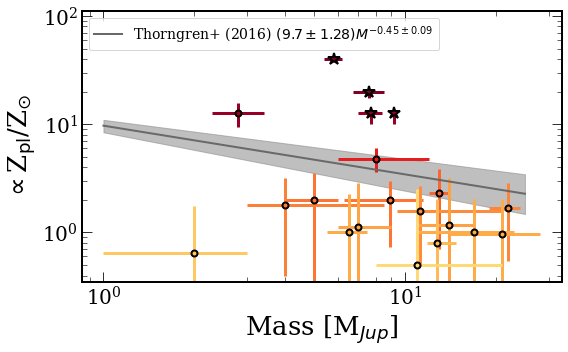

In [87]:
fig, ax = plt.subplots(figsize = (8,5))
# This requires Z/Zstar, not the number ratio of [M/H]
x = np.linspace(1,25,500)
y_med = 9.7 * x**(-0.45)
y_up = (9.7+1.28) * x**(-0.45+0.09)
y_down = (9.7-1.28) * x**(-0.45-0.09)

i = 0
for key,val in planets.items():
    color = (val[0] + 0.8)/2
    marker = 'o'
    msize = 6
    if "HR 8799" in key:
        marker = '*'
        msize = 12
    ax.errorbar(masses[key][0],10**val[0], xerr = [[masses[key][1]],[masses[key][2]]],yerr =[[10**val[1]],[10**val[2]]], 
                color =feh_cmap(color), 
                marker = marker,
                markeredgecolor = 'k', 
                markersize = msize, 
                markeredgewidth = 2,
                elinewidth = 3)
    i+=1
ax.fill_between(x,y_down,y_up,color = 'grey',alpha = 0.5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(0.35,112)
ax.plot(x,y_med,color = 'dimgrey', label = r"Thorngren+ (2016) $(9.7\pm1.28)M^{-0.45\pm0.09}$", linewidth = 2)
ax.legend(fontsize = 14,loc='upper left')
ax.set_xlabel(r"Mass [M$_{Jup}$]")
ax.axhline(0.0, color = 'darkgrey', linewidth = 4, linestyle = '--')
ax.set_ylabel(r"$\propto$Z$_{\rm pl}$/Z$_{\odot}$")
plt.savefig(f"plots/DirectImagedMassMetallicitiesThorngren_{version}.pdf",bbox_inches = 'tight')